### 指定数据

此模块有3个需要自己定义的参数

1. `mydir`: 数据存放的路径。
2. `labelf`: 每个样本的标注信息文件。
3. `labels`: 要让AI系统学习的目标，例如肿瘤的良恶性、T-stage等。

In [38]:
import os
import pandas as pd
from IPython.display import display
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
from onekey_algo import OnekeyDS as okds
from onekey_algo import get_param_in_cwd

os.makedirs('img', exist_ok=True)
os.makedirs('results', exist_ok=True)
os.makedirs('features', exist_ok=True)

# 设置任务Task前缀
task_type = 'Path_'
# 设置数据目录
# mydir = r'你自己数据的路径'
mydir = get_param_in_cwd('radio_dir')
if mydir == okds.ct:
    print(f'正在使用Onekey数据：{okds.ct}，如果不符合预期，请修改目录位置！')
# 对应的标签文件
group_info = get_param_in_cwd('dataset_column') or 'group'
labelf = get_param_in_cwd('label_file') or os.path.join(mydir, 'label.csv')
# 读取标签数据列名
labels = [get_param_in_cwd('task_column') or 'label']

In [39]:
from collections import namedtuple
import onekey_algo.custom.components as okcomp
from onekey_algo import OnekeyDS as okds
from onekey_algo.custom.utils import print_join_info
from onekey_algo import get_param_in_cwd

import pandas as pd
import numpy as np
import os
os.makedirs('img', exist_ok=True)
os.makedirs('features', exist_ok=True)


prob_histo = pd.read_csv('features/path_prob_histogram.csv')
prob_tfidf = pd.read_csv('features/path_prob_tfidf.csv')
prob = pd.merge(prob_histo, prob_tfidf, on='ID', how='inner', suffixes=['_histo', '_tfidf'])
prob['ID'] = prob['ID'].map(lambda x: x.split('-')[0])

pred_histo = pd.read_csv('features/path_pred_histogram.csv')
pred_tfidf = pd.read_csv('features/path_pred_tfidf.csv')
pred = pd.merge(pred_histo, pred_tfidf, on='ID', how='inner', suffixes=['_histo', '_tfidf'])
pred['ID'] = pred['ID'].map(lambda x: x.split('-')[0])

rad_data = pd.merge(prob, pred, on='ID', how='inner').drop_duplicates('ID')
rad_data.to_csv('features/path_features.csv', index=False, header=True)
labels = ['label']
featrues_not_use = ['ID']
rad_data

,ID,prob-0.0,prob-0.01,prob-0.02,prob-0.03,prob-0.04,prob-0.05,prob-0.06,prob-0.07,prob-0.08,...,prob095,prob096,prob097,prob098,prob099,prob10,pred-0,pred-1,pred0,pred1
0,1238060,0.0,0.0,0.0,0.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,...,0.047,0.067,0.030,0.011,0.006,0.000,0.020,0.980,0.020,1.000
1,1240023,0.0,0.0,0.0,0.0,3.349e-04,3.349e-04,6.698e-04,3.349e-04,2.009e-03,...,0.000,0.000,0.000,0.000,0.000,0.000,0.780,0.220,0.963,0.270
2,1310929,0.0,0.0,0.0,0.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,4.067e-04,...,0.081,0.079,0.041,0.036,0.005,0.000,0.080,0.920,0.087,0.996
3,1317999,0.0,0.0,0.0,0.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,...,0.135,0.110,0.062,0.057,0.036,0.000,0.053,0.947,0.056,0.998
4,1320927,0.0,0.0,0.0,0.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,3.171e-04,...,0.266,0.294,0.322,0.297,0.165,0.084,0.044,0.956,0.046,0.999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,2318751,0.0,0.0,0.0,0.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,...,0.167,0.166,0.124,0.069,0.064,0.005,0.127,0.873,0.144,0.990
1047,2318753,0.0,0.0,0.0,0.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,...,0.122,0.117,0.084,0.043,0.012,0.000,0.055,0.945,0.058,0.998
1048,2318951,0.0,0.0,0.0,0.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,...,0.226,0.219,0.290,0.373,0.536,0.389,0.008,0.992,0.008,1.000
1049,2318954,0.0,0.0,0.0,0.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,...,0.043,0.038,0.030,0.020,0.002,0.000,0.378,0.622,0.520,0.854


## 标注数据

数据以csv格式进行存储，这里如果是其他格式，可以使用自定义函数读取出每个样本的结果。

要求label_data为一个`DataFrame`格式，包括ID列以及后续的labels列，可以是多列，支持Multi-Task。

In [40]:
from onekey_algo.custom.components.comp1 import fillna
label_data = pd.read_csv(get_param_in_cwd('survival_file'), dtype={'ID': str})
group_info = pd.read_csv('data/path_ids.csv', dtype={'ID': str})[['ID', 'group']]
label_data = pd.merge(label_data, group_info, on='ID', how='inner').drop_duplicates('ID')
label_data['group'] = label_data['group'].map(lambda x: x if not pd.isna(x) else 'test')
label_data.to_csv('data/group.csv', index=False)
# label_data['group'] = label_data['group'].map(lambda x: x if not pd.isna(x) else 'test')
print(label_data['group'].value_counts())
label_data

train    490
test     210
Name: group, dtype: int64


,ID,OSTime,OS,group
0,1238060,4.50,0,train
1,1240023,28.47,0,train
2,1310929,5.73,1,test
3,1320927,7.30,1,test
4,1322885,4.87,0,train
...,...,...,...,...
695,2017433,22.23,1,test
696,2018527,5.07,0,train
697,2018539,16.73,1,train
698,2018734,10.93,1,test


## 特征拼接 

将标注数据`label_data`与`rad_data`进行合并，得到训练数据。

**注意：** 
1. 需要删掉ID这一列
2. 如果发现数据少了，需要自行检查数据是否匹配。

In [41]:
event_col = get_param_in_cwd('event_col', 'label')
duration_col=get_param_in_cwd('duration_col', 'time')

combined_data = pd.merge(rad_data, label_data, on=['ID'], how='inner')
print(combined_data[event_col].value_counts())
combined_data

1    496
0    204
Name: OS, dtype: int64


,ID,prob-0.0,prob-0.01,prob-0.02,prob-0.03,prob-0.04,prob-0.05,prob-0.06,prob-0.07,prob-0.08,...,prob098,prob099,prob10,pred-0,pred-1,pred0,pred1,OSTime,OS,group
0,1238060,0.0,0.0,0.0,0.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,...,0.011,0.006,0.000,0.020,0.980,0.020,1.000,4.50,0,train
1,1240023,0.0,0.0,0.0,0.0,3.349e-04,3.349e-04,6.698e-04,3.349e-04,2.009e-03,...,0.000,0.000,0.000,0.780,0.220,0.963,0.270,28.47,0,train
2,1310929,0.0,0.0,0.0,0.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,4.067e-04,...,0.036,0.005,0.000,0.080,0.920,0.087,0.996,5.73,1,test
3,1320927,0.0,0.0,0.0,0.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,3.171e-04,...,0.297,0.165,0.084,0.044,0.956,0.046,0.999,7.30,1,test
4,1322885,0.0,0.0,0.0,0.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,...,0.031,0.009,0.000,0.028,0.972,0.028,1.000,4.87,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2017217,0.0,0.0,0.0,0.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,...,0.190,0.140,0.036,0.009,0.991,0.009,1.000,10.77,0,train
696,2017433,0.0,0.0,0.0,0.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,...,0.193,0.071,0.014,0.026,0.974,0.027,1.000,22.23,1,test
697,2018527,0.0,0.0,0.0,0.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,...,0.029,0.004,0.006,0.089,0.911,0.098,0.995,5.07,0,train
698,2018539,0.0,0.0,0.0,0.0,2.644e-04,1.322e-04,0.000e+00,1.322e-04,5.288e-04,...,0.007,0.004,0.000,0.526,0.474,0.744,0.669,16.73,1,train


## 正则化

`normalize_df` 为onekey中正则化的API，将数据变化到0均值1方差。正则化的方法为

$column = \frac{column - mean}{std}$

In [42]:
from onekey_algo.custom.components.comp1 import normalize_df
data = normalize_df(combined_data, not_norm=['ID', event_col, duration_col], group='group', use_train=True)
data = data.dropna(axis=1)
data.describe()

[2024-03-24 22:00:04 - comp1.py: 186]	INFO	正在使用训练集预定数据进行标准化。


,prob-0.0,prob-0.01,prob-0.02,prob-0.03,prob-0.04,prob-0.05,prob-0.06,prob-0.07,prob-0.08,prob-0.09,...,prob097,prob098,prob099,prob10,pred-0,pred-1,pred0,pred1,OSTime,OS
count,700.000,700.000,700.000,700.000,700.000,700.000,700.000,700.000,700.000,700.000,...,700.000,700.000,700.000,700.000,700.000,700.000,700.000,700.000,700.000,700.000
mean,-0.023,-0.029,-0.035,-0.044,-0.056,-0.063,-0.074,-0.093,-0.106,-0.112,...,0.521,0.563,0.427,0.408,-0.548,0.548,-0.557,0.357,25.619,0.709
std,0.837,0.838,0.838,0.839,0.841,0.842,0.845,0.850,0.856,0.856,...,1.463,1.829,1.852,2.451,1.191,1.191,1.200,0.999,18.931,0.455
min,-0.076,-0.098,-0.120,-0.152,-0.192,-0.219,-0.263,-0.325,-0.381,-0.395,...,-0.341,-0.307,-0.228,-0.166,-2.067,-2.223,-2.053,-2.916,0.800,0.000
25%,-0.076,-0.098,-0.120,-0.152,-0.192,-0.219,-0.263,-0.325,-0.381,-0.395,...,-0.341,-0.307,-0.228,-0.166,-1.818,-0.454,-1.861,-0.271,10.898,0.000
50%,-0.076,-0.098,-0.120,-0.152,-0.192,-0.219,-0.263,-0.325,-0.381,-0.395,...,-0.282,-0.268,-0.228,-0.166,-0.504,0.504,-0.534,0.762,20.580,1.000
75%,-0.076,-0.098,-0.120,-0.152,-0.192,-0.219,-0.263,-0.175,-0.191,-0.204,...,0.841,0.393,-0.033,-0.166,0.454,1.818,0.562,1.199,34.470,1.000
max,19.957,16.418,14.404,14.383,14.340,14.165,13.907,11.749,10.234,10.854,...,9.260,9.597,14.559,31.517,2.223,2.067,1.560,1.206,92.630,1.000


In [43]:
from onekey_algo.custom.components.comp1 import normalize_df, select_feature

corr_name = get_param_in_cwd('corr_name', 'pearson')
if os.path.exists(f'features/{task_type}_features_sel.csv') and False:
    data = pd.read_csv(f'features/{task_type}_features_sel.csv', header=0)
else:
    sel_feature = select_feature(data[data['group'] == 'train'][[c for c in data.columns if c not in [event_col, duration_col]]].corr(corr_name), 
                                 threshold=0.9, topn=10, verbose=False)
    data = data[['ID'] + sel_feature + [event_col, duration_col, 'group']]
    data.to_csv(f'features/{task_type}_features_sel.csv', header=True, index=False)
data

,ID,prob-0.69,prob00,prob009,prob01,prob012,prob013,prob015,prob017,prob018,...,prob07,prob075,prob088,prob095,prob099,prob10,pred1,OS,OSTime,group
2,1310929,2.859,-0.087,-0.450,-0.500,-0.578,-0.370,-0.698,-0.750,-0.439,...,2.366,1.426,0.862,1.289,-0.118,-0.166,1.188,1,5.73,test
3,1320927,1.775,-0.087,-0.450,-0.500,-0.414,-0.631,-0.552,-0.509,-0.649,...,1.898,0.450,1.656,5.226,3.659,4.959,1.201,1,7.30,test
7,1421838,2.190,-0.087,-0.450,-0.500,-0.578,-0.631,-0.698,-0.750,-0.763,...,1.892,2.052,2.172,3.117,1.074,-0.166,1.204,0,9.93,test
8,1425167,1.112,-0.087,-0.450,-0.500,-0.578,-0.631,-0.698,-0.750,-0.763,...,1.302,2.172,2.400,2.383,1.040,-0.166,1.203,0,6.00,test
12,1445891,1.211,-0.087,-0.450,-0.500,-0.578,-0.631,-0.698,-0.750,-0.763,...,1.994,1.434,1.998,1.593,0.016,-0.166,1.199,1,7.93,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,2016335,1.977,-0.087,-0.450,-0.500,-0.578,-0.631,-0.698,-0.750,-0.763,...,1.735,2.231,2.248,3.419,0.913,0.230,1.206,0,10.40,train
693,2016764,2.709,-0.087,-0.450,-0.500,-0.578,-0.631,-0.698,-0.750,-0.763,...,2.483,2.294,0.978,0.061,-0.149,-0.166,1.204,0,13.30,train
695,2017217,0.919,-0.087,-0.450,-0.500,-0.578,-0.631,-0.698,-0.750,-0.763,...,0.726,1.811,2.552,3.322,3.081,1.997,1.206,0,10.77,train
697,2018527,2.565,-0.087,-0.450,-0.500,-0.578,-0.631,-0.698,-0.750,-0.763,...,1.530,1.861,1.500,1.019,-0.126,0.187,1.182,0,5.07,train


## 构建数据

将样本的训练数据X与监督信息y分离出来，并且对训练数据进行划分，一般的划分原则为80%-20%

In [44]:
import numpy as np
import onekey_algo.custom.components as okcomp
from collections import OrderedDict

group_info = get_param_in_cwd('group_info', 'group')
train_data = data[(data[group_info] == 'train')]

# subsets = [s for s in label_data['group'].value_counts().index if s != 'train']
subsets = ['train', 'test']
val_datasets = OrderedDict()
for subset in subsets:
    val_data = data[data[group_info] == subset]
    val_datasets[subset] = val_data
    val_data.to_csv(f'features/{task_type}_{subset}_features_norm.csv', index=False)

print('，'.join([f"{subset}样本数：{d_.shape}" for subset, d_ in val_datasets.items()]))

train样本数：(490, 54)，test样本数：(210, 54)


### Lasso -COX

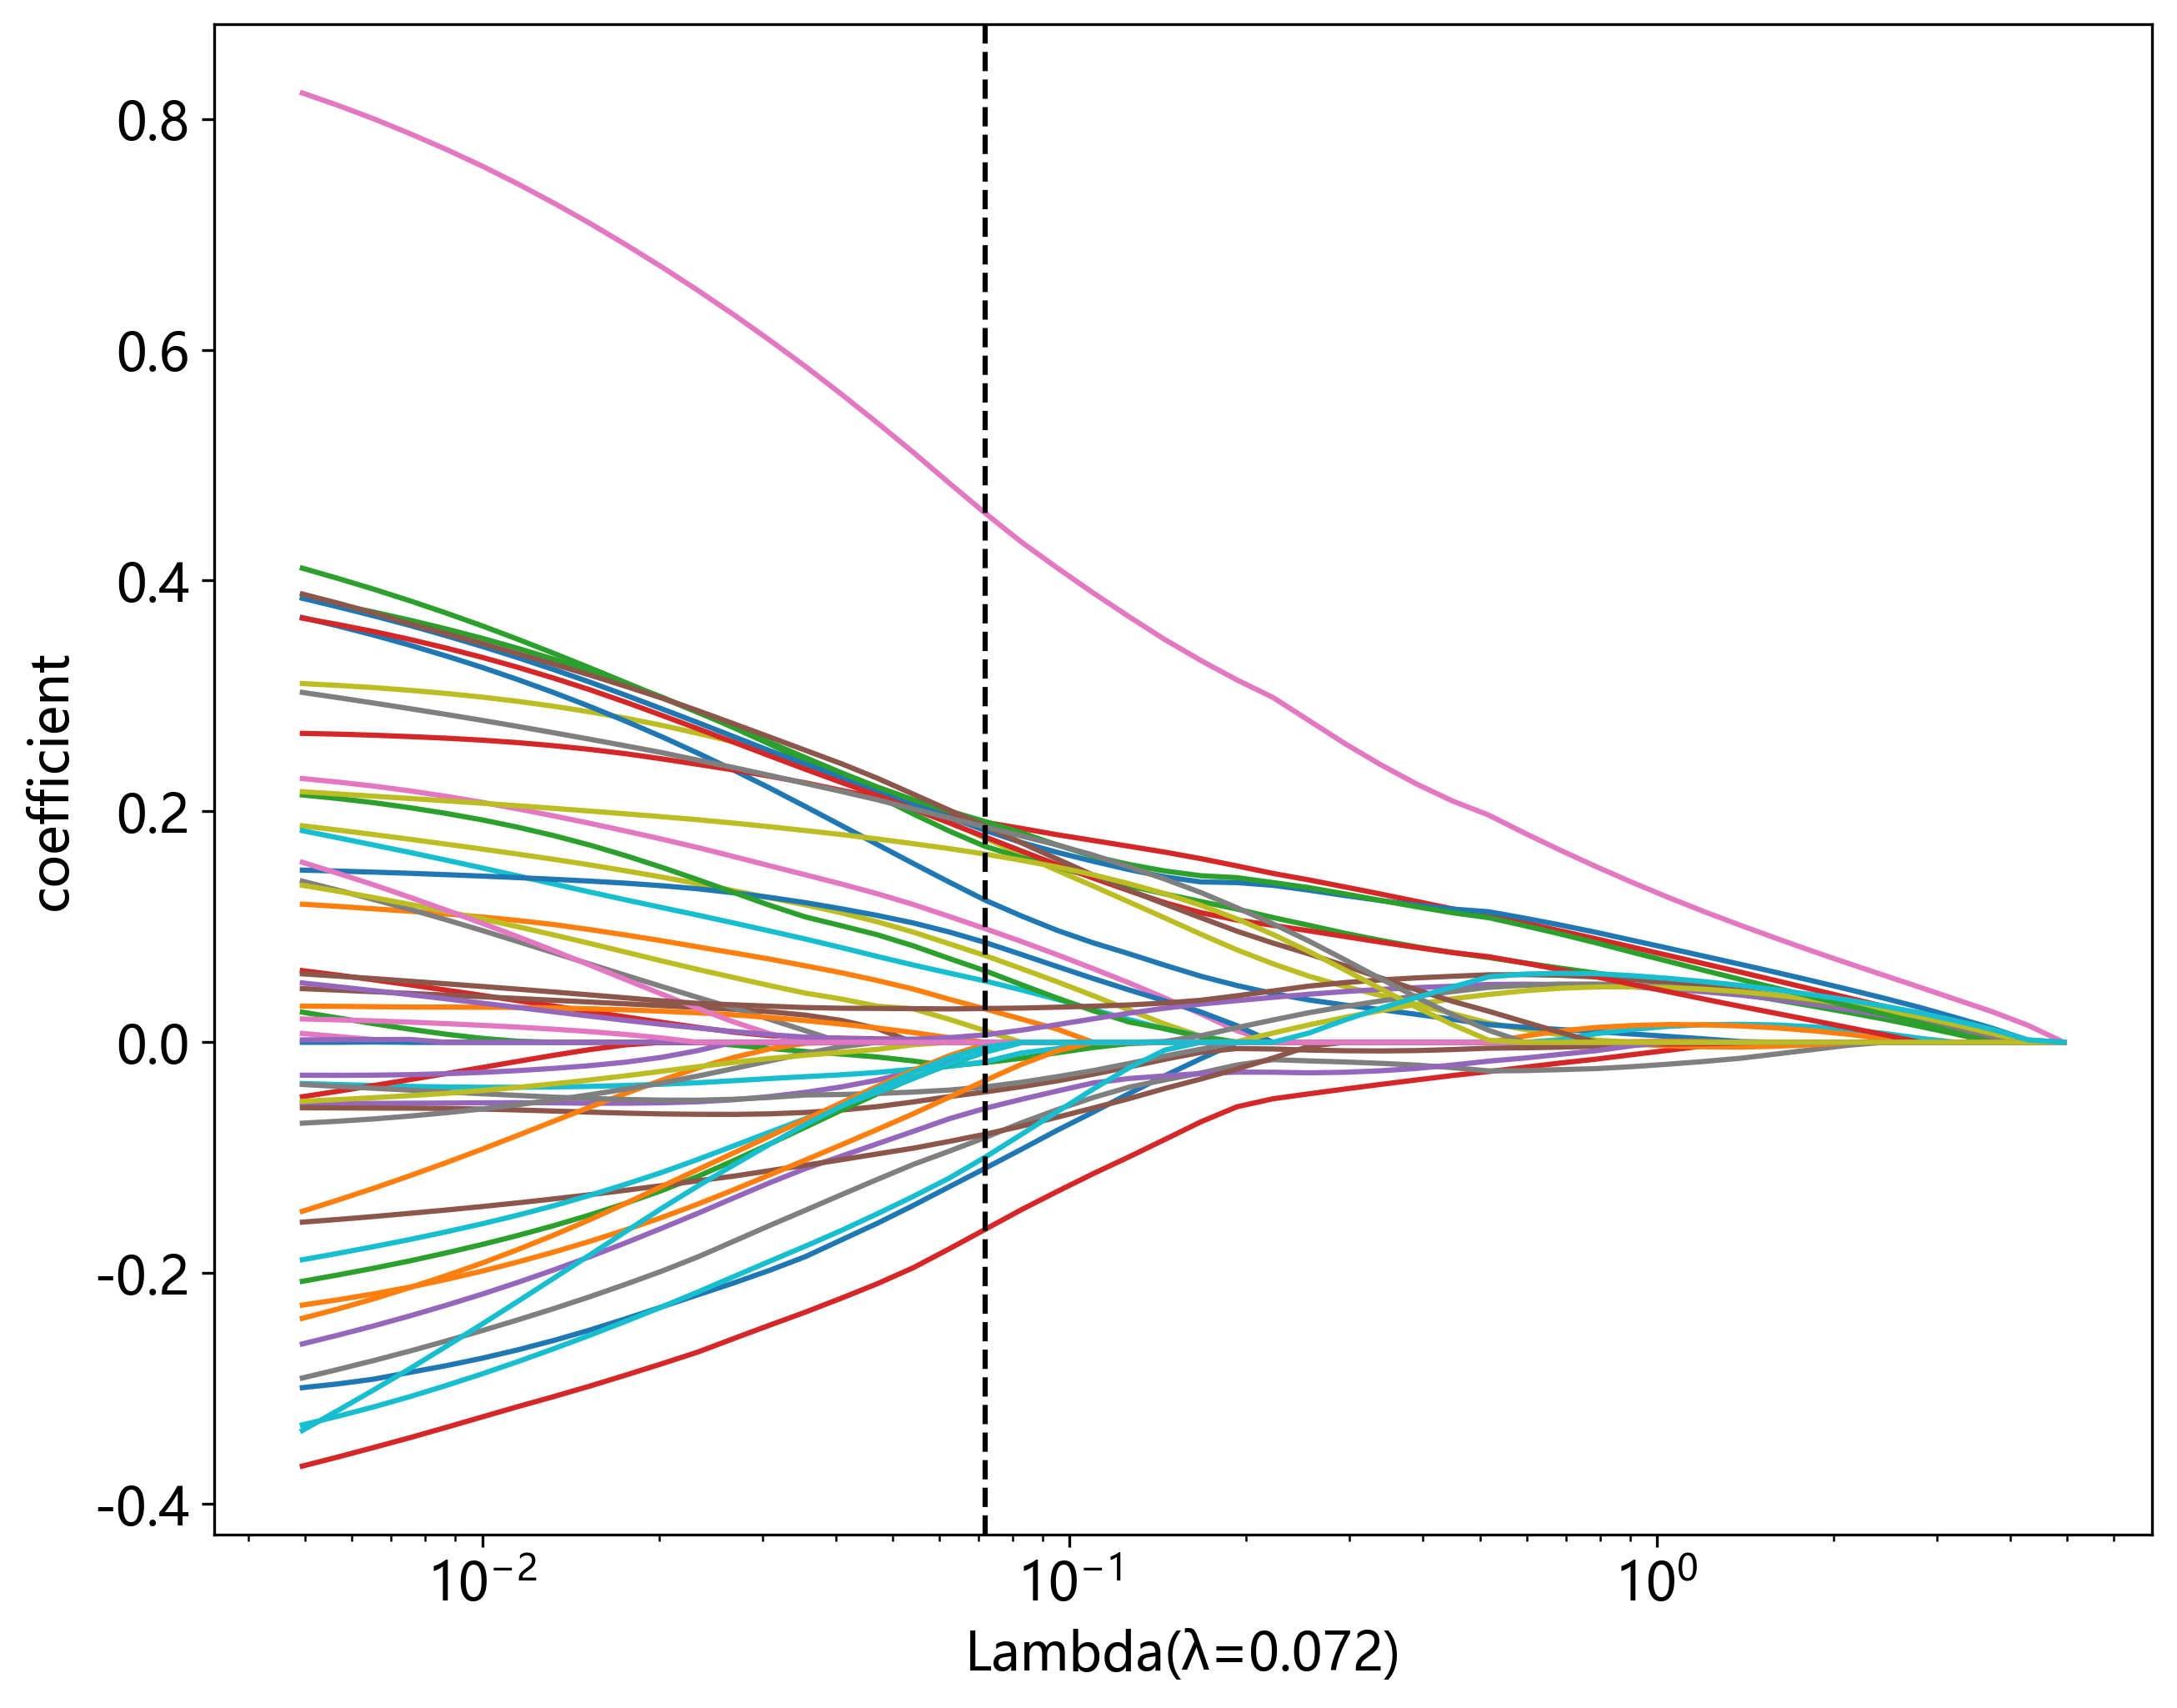

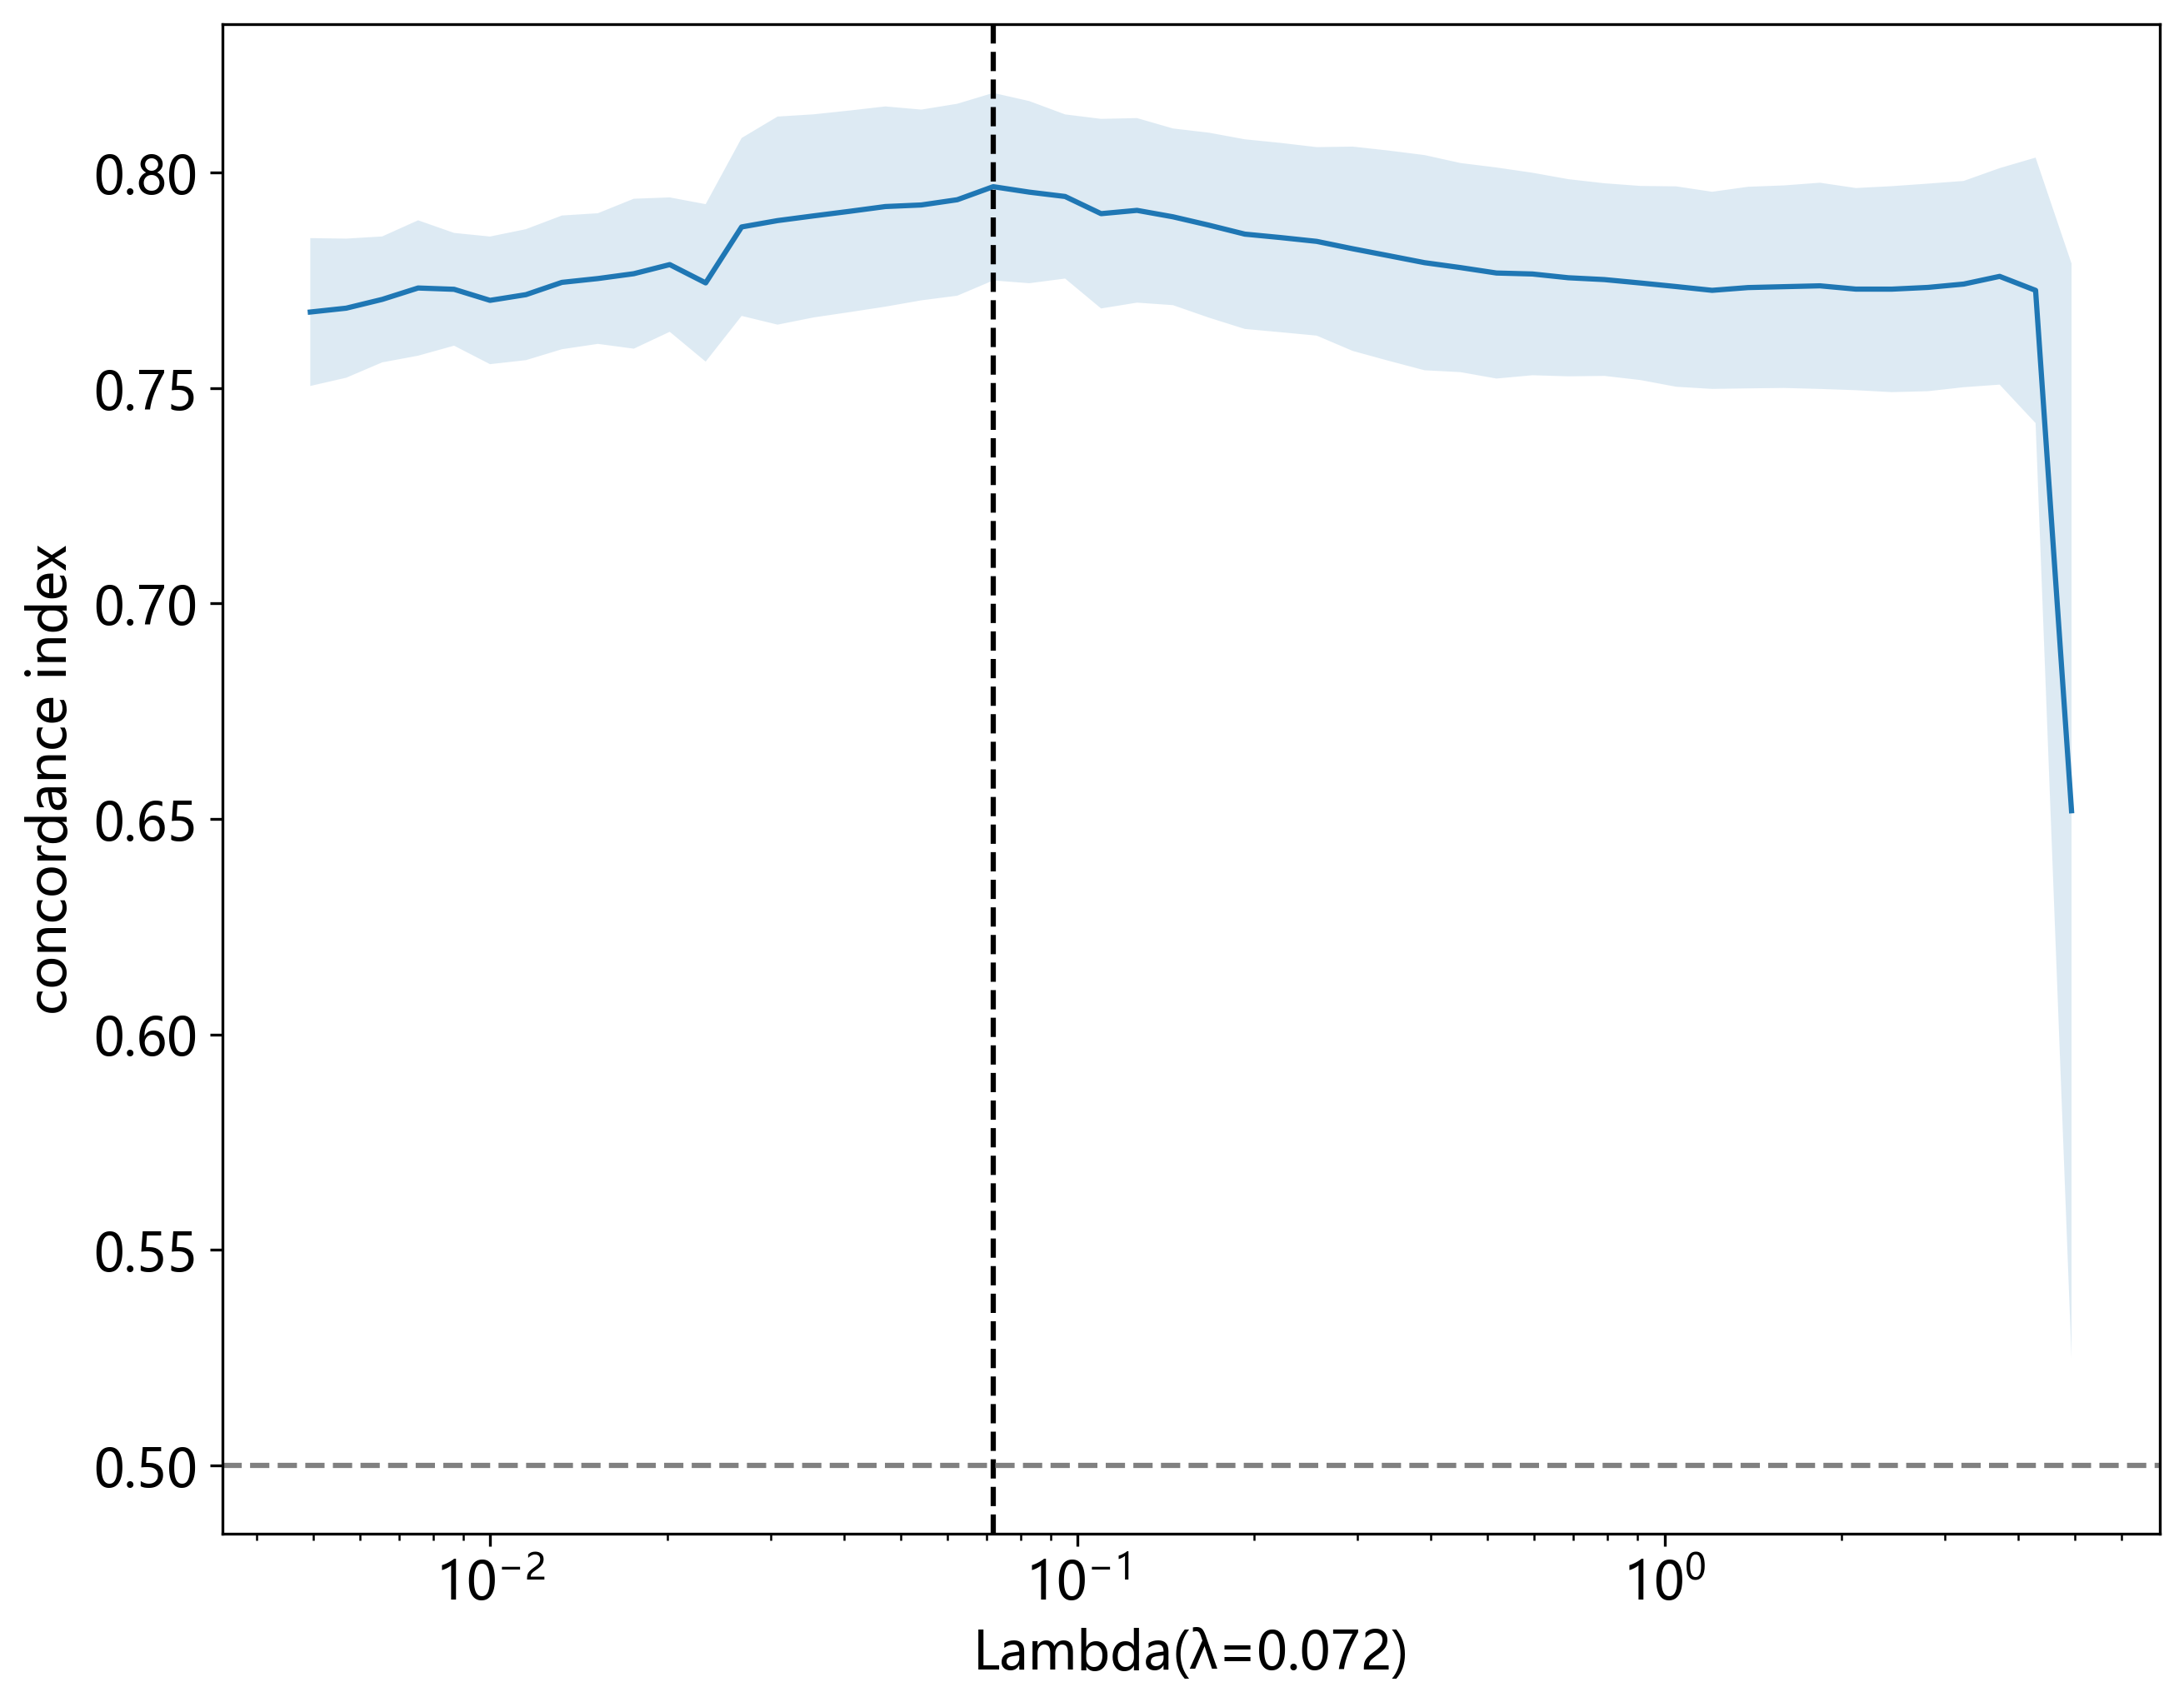

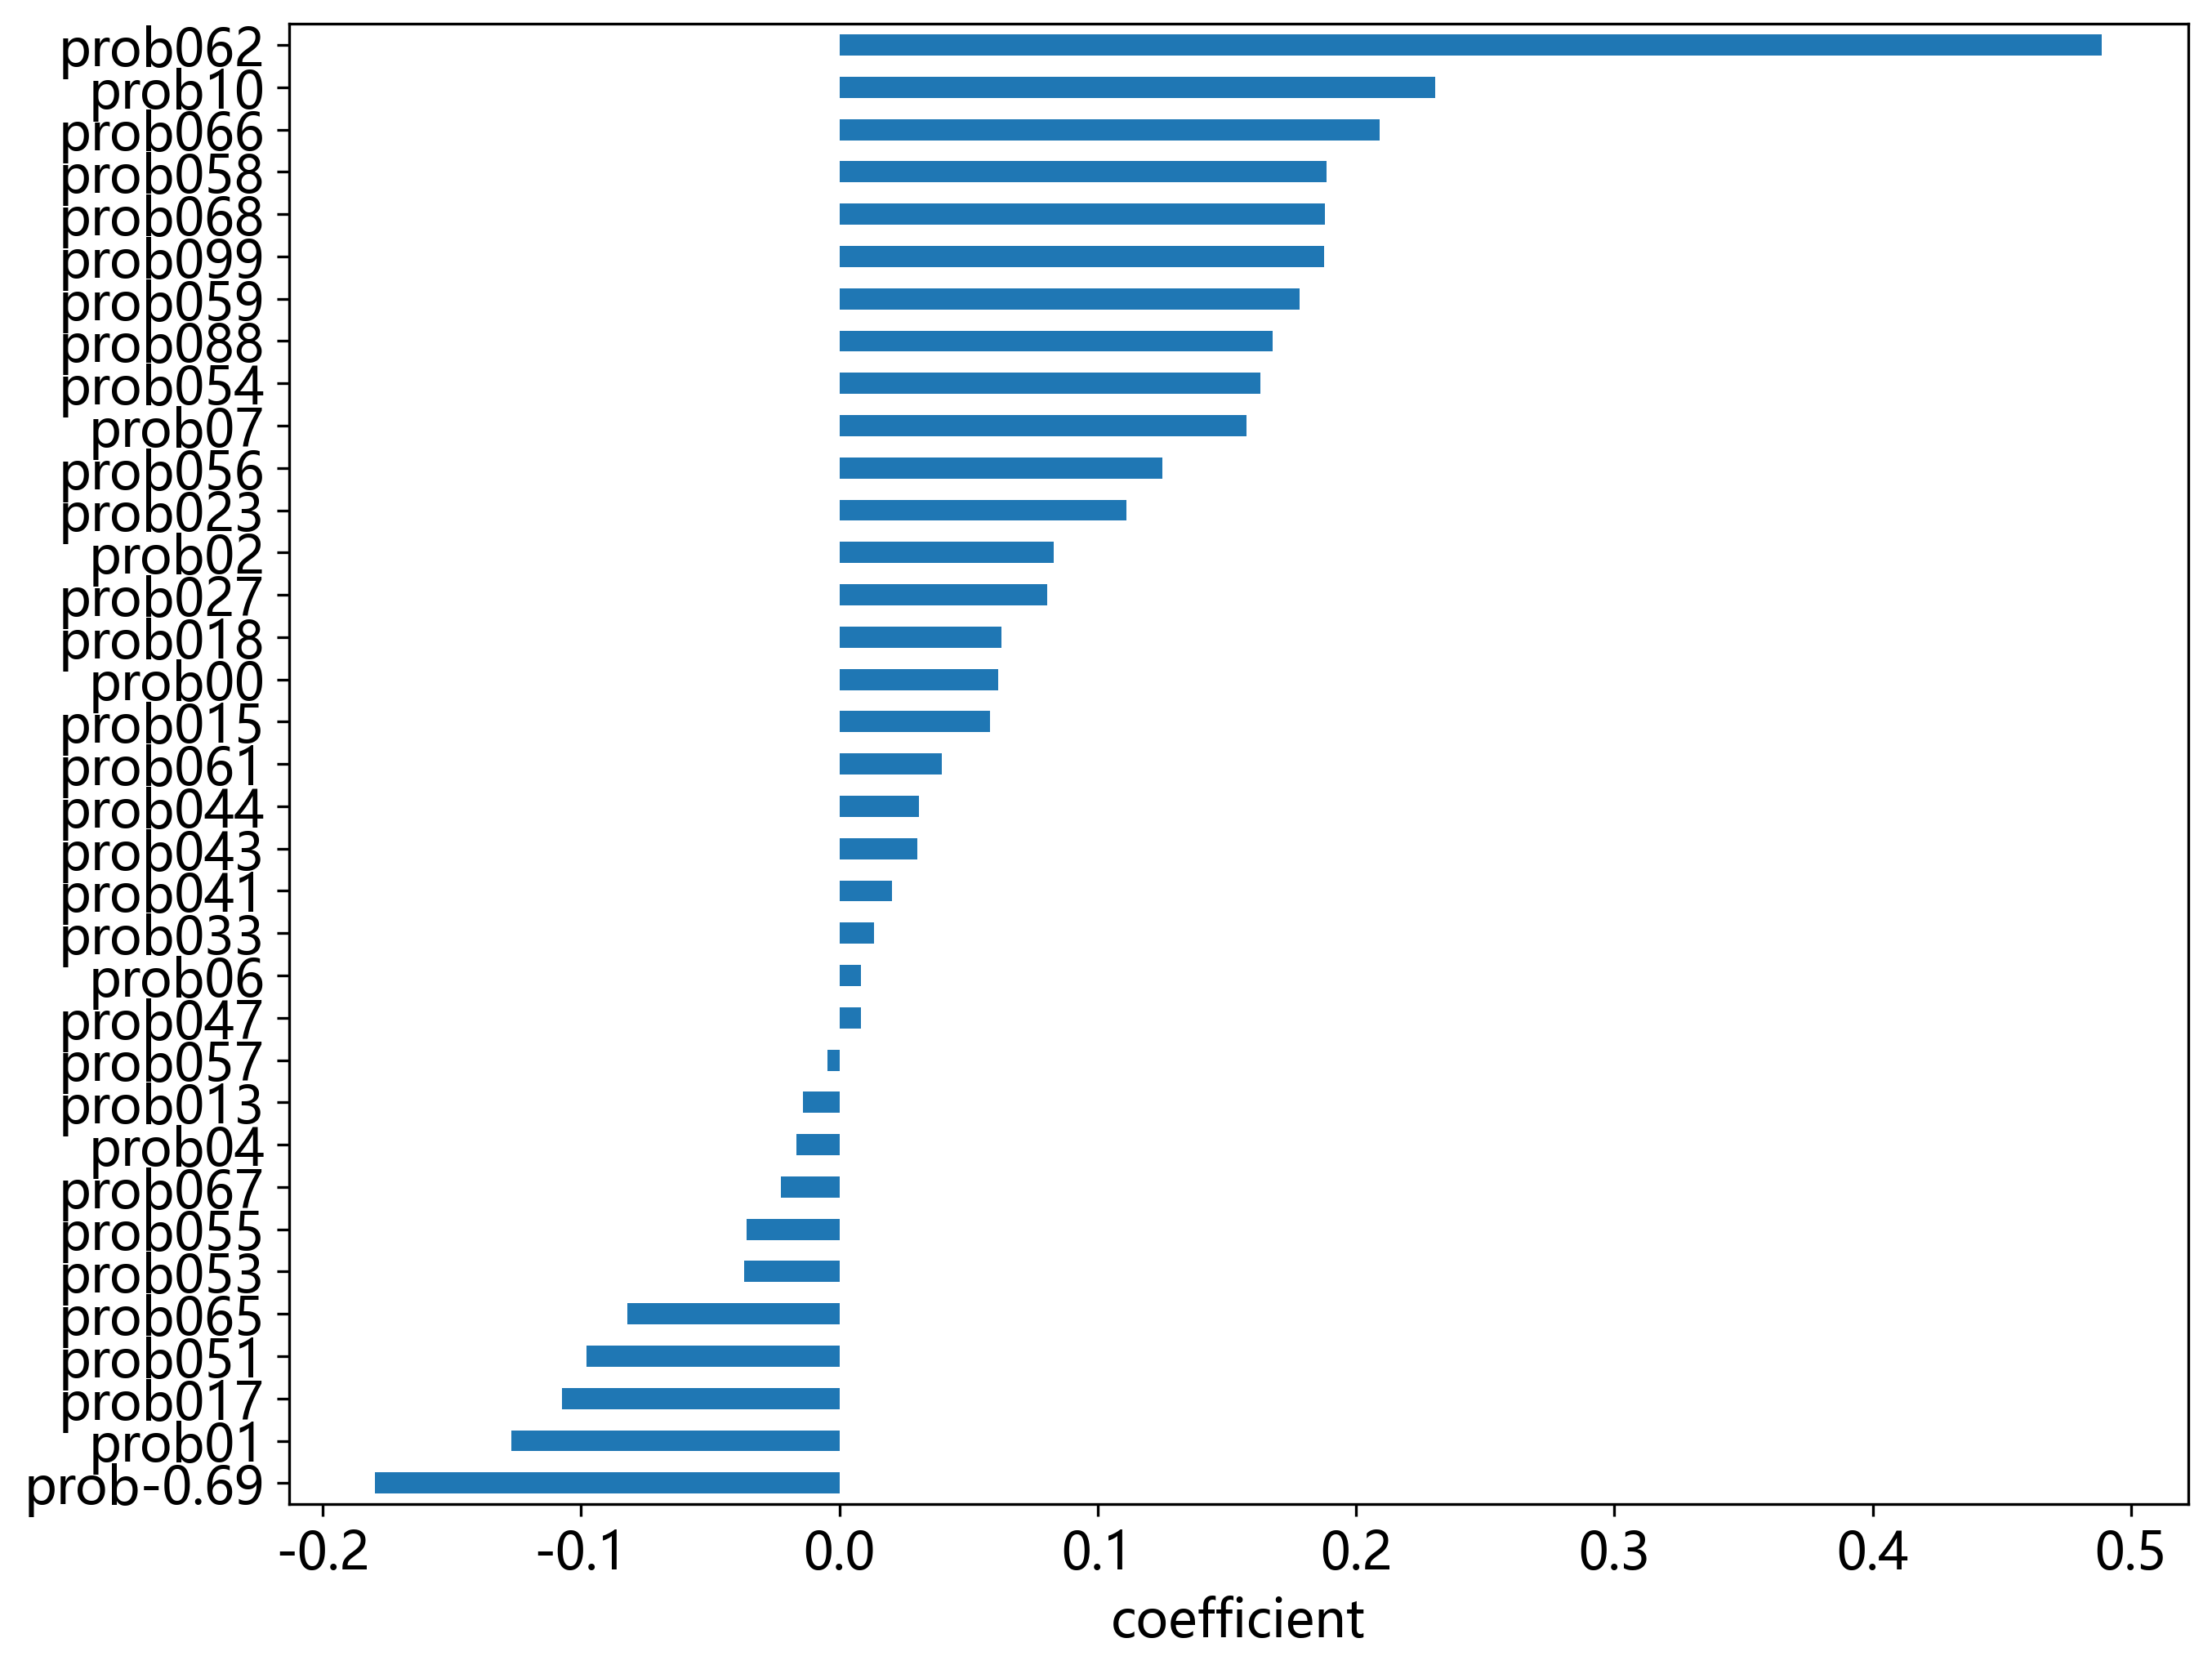

Survive = -0.179719 * prob-0.69 -0.127114 * prob01 -0.107385 * prob017 -0.098035 * prob051 -0.081975 * prob065 -0.036838 * prob053 -0.035987 * prob055 -0.022513 * prob067 -0.016526 * prob04 -0.014212 * prob013 -0.004526 * prob057 +0.008273 * prob047 +0.008309 * prob06 +0.013316 * prob033 +0.020466 * prob041 +0.030286 * prob043 +0.030749 * prob044 +0.039766 * prob061 +0.058362 * prob015 +0.061425 * prob00 +0.062724 * prob018 +0.080311 * prob027 +0.082977 * prob02 +0.110971 * prob023 +0.124979 * prob056 +0.157454 * prob07 +0.162955 * prob054 +0.167756 * prob088 +0.178076 * prob059 +0.187561 * prob099 +0.187927 * prob068 +0.188650 * prob058 +0.209215 * prob066 +0.230553 * prob10 +0.488633 * prob062


In [45]:
from onekey_algo.custom.components.survival import get_x_y_survival, lasso_cox_cv
COEF_THRESHOLD = 1e-6

X, y = get_x_y_survival(train_data, val_outcome=1, event_col=event_col, duration_col=duration_col)
sel_features = lasso_cox_cv(X, y, max_iter=200,  norm_X=False, prefix=f"{task_type}", l1_ratio=0.1, cv=10, ppoints=50, alpha_logmin=-3)
# sel_features = lasso_cox_cv(X, y, max_iter=1000,  norm_X=False, prefix=f"{task}_", l1_ratio=0.8, cv=10)

In [46]:
# train_data = train_data[['ID'] + list(sel_features.index) + [event_col, duration_col]]
# for subset in subsets:
#     val_datasets[subset] = val_datasets[subset][['ID'] + list(sel_features.index) + [event_col, duration_col]]
#     val_datasets[subset].to_csv(f'features/{task_type}{subset}_cox.csv', index=False)

### 聚类分析

通过修改变量名，可以可视化不同相关系数下的相聚类分析矩阵。

注意：当特征特别多的时候（大于100），尽量不要可视化，否则运行时间会特别长。

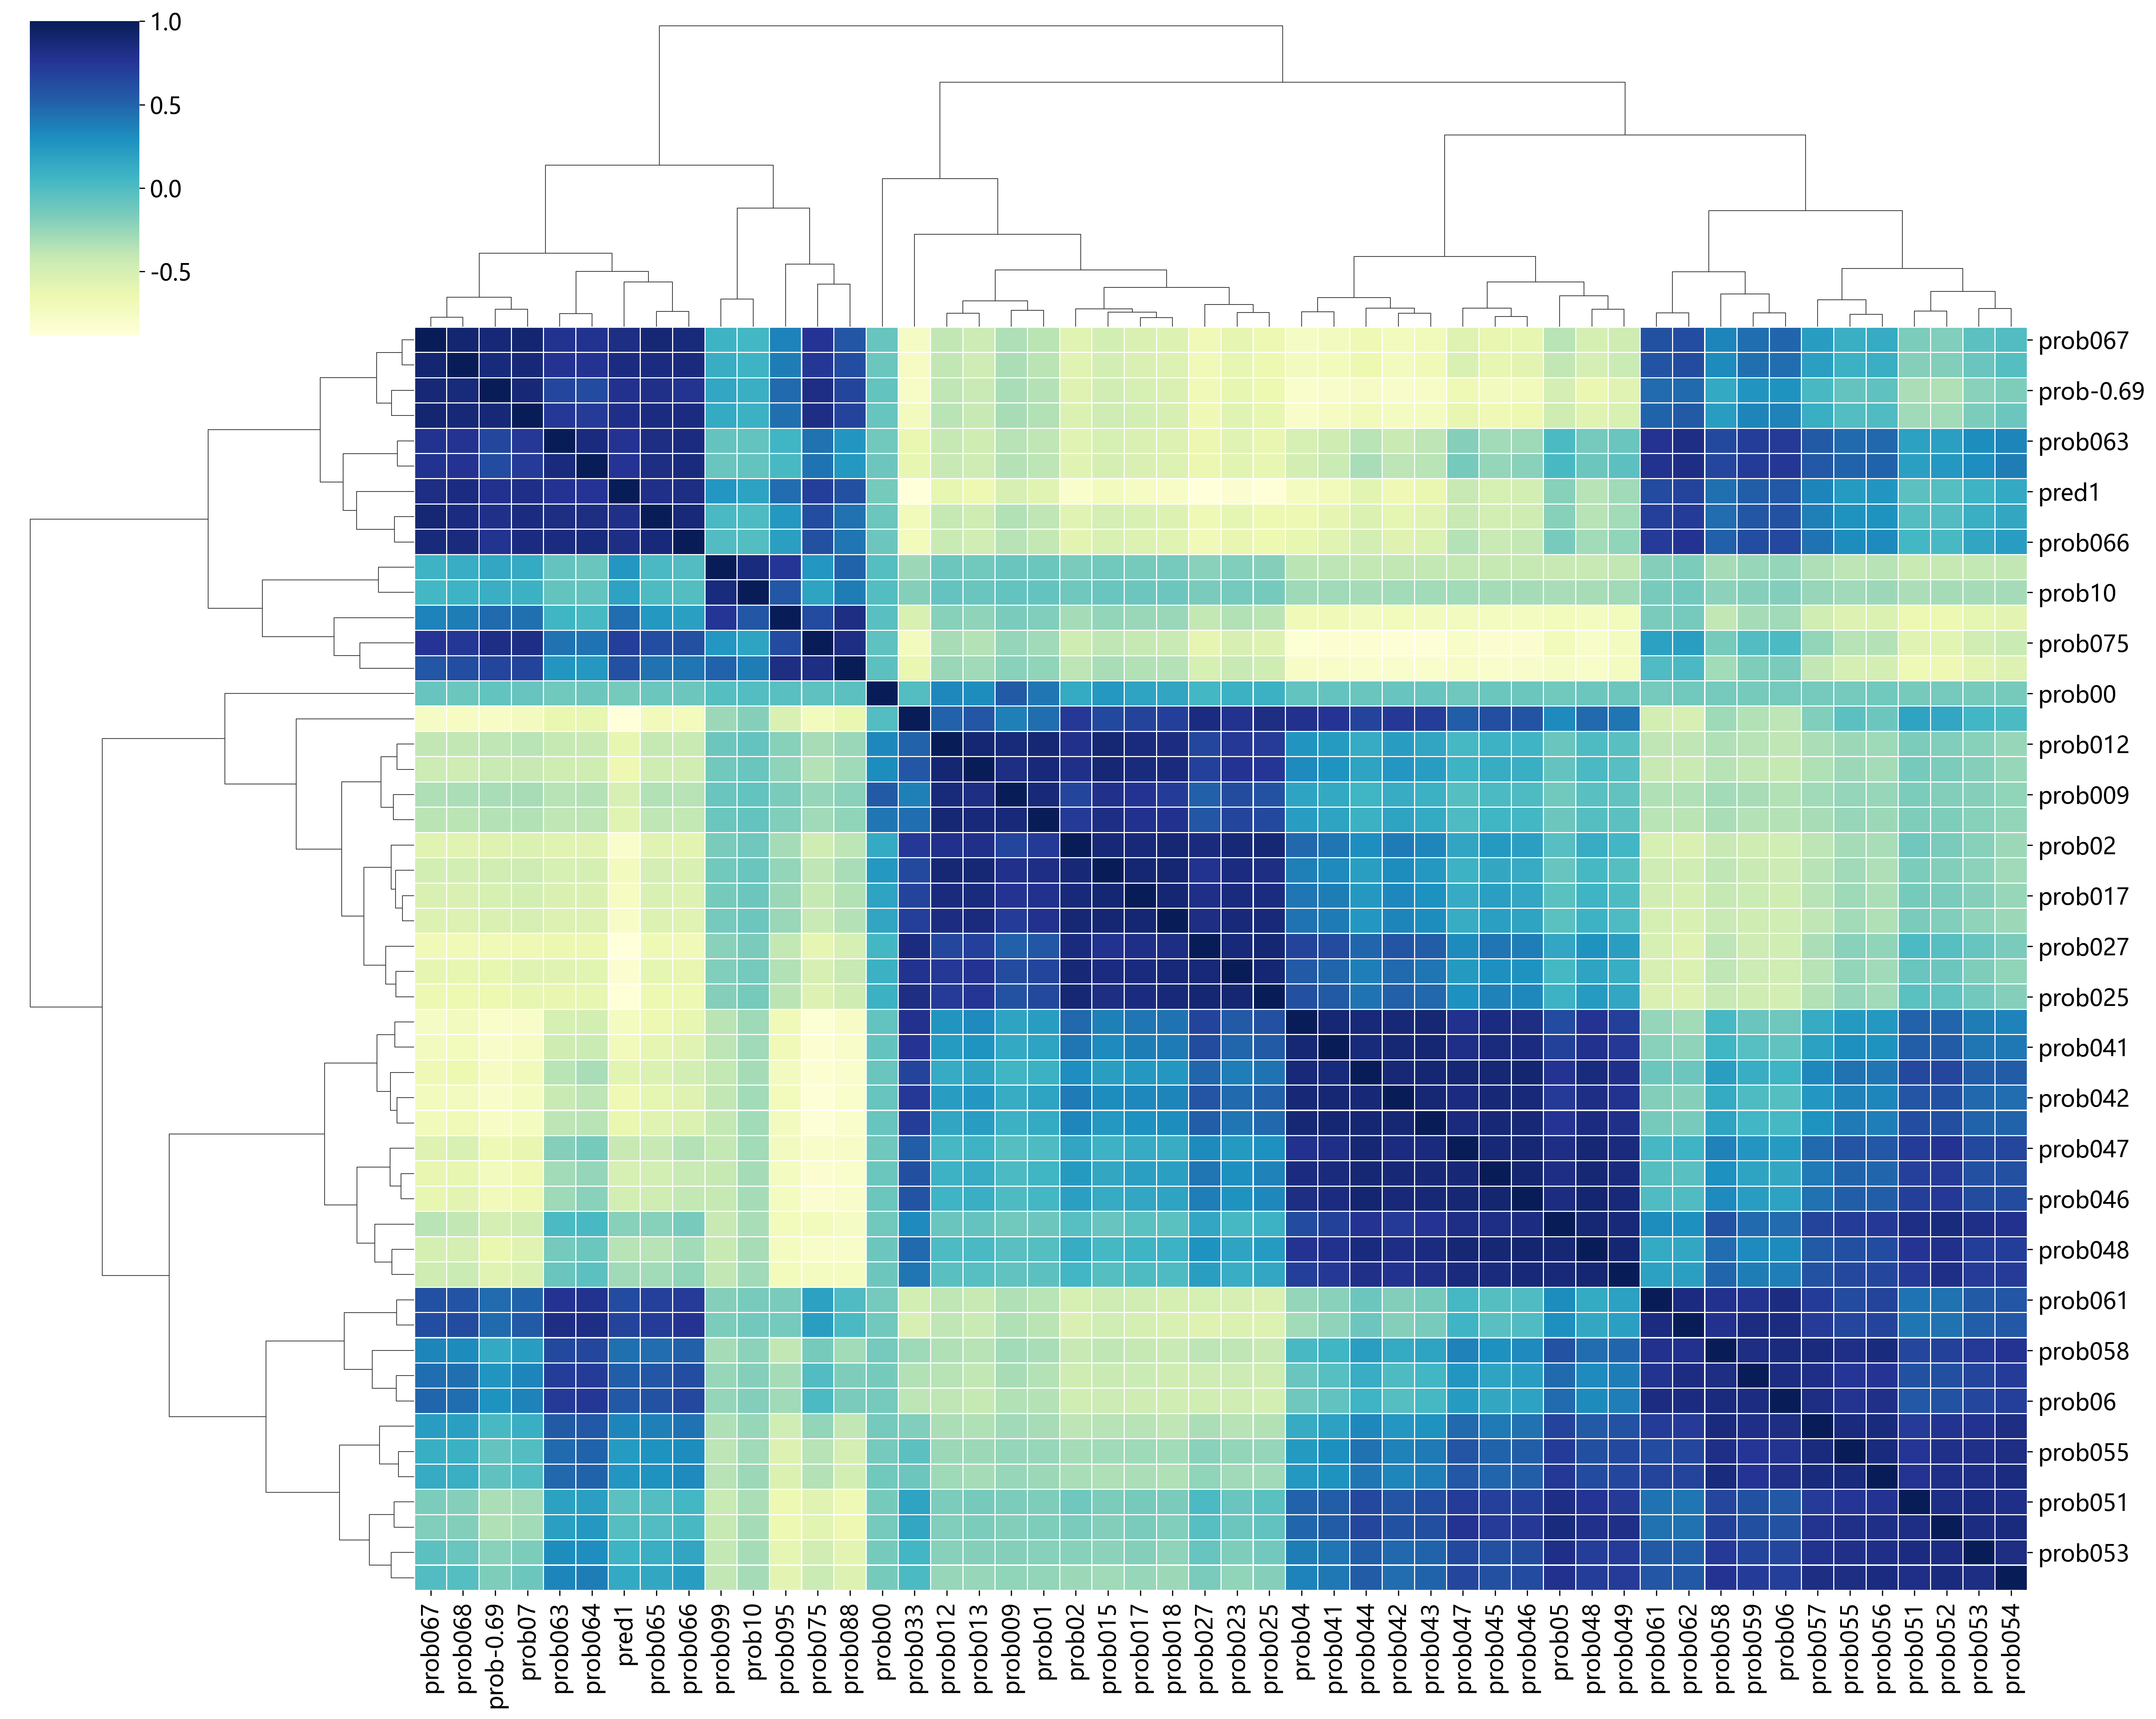

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

if train_data.shape[1] < 150:
    pp = sns.clustermap(train_data[[c for c in train_data.columns if c not in [event_col, duration_col, 'group']]].corr(corr_name), 
                        linewidths=.5, figsize=(20.0, 16.0), cmap='YlGnBu')
    plt.setp(pp.ax_heatmap.get_yticklabels(), rotation=0)
    plt.savefig(f'img/{task_type}feature_cluster.svg', bbox_inches = 'tight')

In [48]:
from lifelines import CoxPHFitter

cph = CoxPHFitter(penalizer=0.01)
cph.fit(train_data[[c for c in train_data.columns if c not in ['ID', 'group']]], duration_col=duration_col, event_col=event_col)
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 490 total observations, 136 right-censored observations>
             duration col = 'OSTime'
                event col = 'OS'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 490
number of events observed = 354
   partial log-likelihood = -1735.54
         time fit was run = 2024-03-24 14:00:57 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
prob-0.69  -0.30       0.74       0.18            -0.66             0.05                 0.52                 1.05
prob00      0.12       1.12       0.09            -0.05             0.29                 0.95                 1.33
prob009     0.06       1.06       0.15            -0.23             0.35                 0.79                 1.42
prob01     -0.38       0.68       0.15            -0.69            -0.08                 0.50                 0.92
prob012    -0.04       0.96       0.15            -0.34             0.26                 0.71                 1.30
prob013    -0.06       0.94       0.14            -0.33             0.21                 0.72                 1.24
prob015     0.22       1.25       0.17            -0.10             0.55                 0.90                 1.74
prob017    -0.32       0.73       0.16            -0.63            -0.01                 0.53                 0.99
prob018     0.19       1.21       0.16            -0.12             0.50                 0.89                 1.65
prob02      0.22       1.25       0.16            -0.09             0.53                 0.91                 1.70
prob023     0.16       1.18       0.14            -0.12             0.44                 0.89                 1.56
prob025    -0.18       0.83       0.16            -0.50             0.13                 0.60                 1.14
prob027     0.19       1.21       0.16            -0.13             0.52                 0.88                 1.68
prob033     0.06       1.07       0.15            -0.23             0.36                 0.80                 1.43
prob04     -0.26       0.77       0.17            -0.59             0.08                 0.55                 1.08
prob041     0.05       1.05       0.14            -0.22             0.33                 0.80                 1.39
prob042     0.02       1.02       0.15            -0.27             0.32                 0.76                 1.38
prob043     0.17       1.18       0.16            -0.14             0.47                 0.87                 1.60
prob044     0.16       1.17       0.16            -0.15             0.46                 0.86                 1.59
prob045    -0.03       0.97       0.16            -0.34             0.28                 0.71                 1.32
prob046     0.01       1.01       0.16            -0.31             0.33                 0.73                 1.39
prob047     0.05       1.05       0.16            -0.26             0.35                 0.77                 1.42
prob048    -0.22       0.81       0.17            -0.55             0.12                 0.58                 1.12
prob049    -0.07       0.94       0.15            -0.37             0.23                 0.69                 1.26
prob05     -0.02       0.98       0.16            -0.33             0.29                 0.72                 1.33
prob051    -0.17       0.84       0.13            -0.43             0.09                 0.65                 1.09
prob052     0.17       1.18       0.14            -0.11             0.44                 0.90                 1.55
prob053    -0.04       0.96       0.12            -0.27             0.20                 0.76                 1.22
prob054     0.29       1.34       0.12             0.05             0.53                 1.05                 1.71
prob055    -0

In [49]:
print(cph.concordance_index_)
su = cph.summary[['exp(coef)', 'exp(coef) lower 95%', 'exp(coef) upper 95%', 'p']]
su.columns = ['HR', 'HR lower 95%', 'HR upper 95%', 'pvalue']
su.reset_index().to_csv(f'features/{task_type}_features_HR.csv', index=False)
su

0.8094433283374257


,HR,HR lower 95%,HR upper 95%,pvalue
covariate,,,,
prob-0.69,0.739,0.519,1.053,9.414e-02
prob00,1.123,0.947,1.333,1.833e-01
prob009,1.060,0.793,1.416,6.964e-01
prob01,0.681,0.503,0.920,1.241e-02
prob012,0.962,0.713,1.297,7.988e-01
prob013,0.945,0.722,1.237,6.794e-01
prob015,1.252,0.903,1.738,1.782e-01
prob017,0.727,0.534,0.989,4.221e-02
prob018,1.211,0.891,1.647,2.210e-01


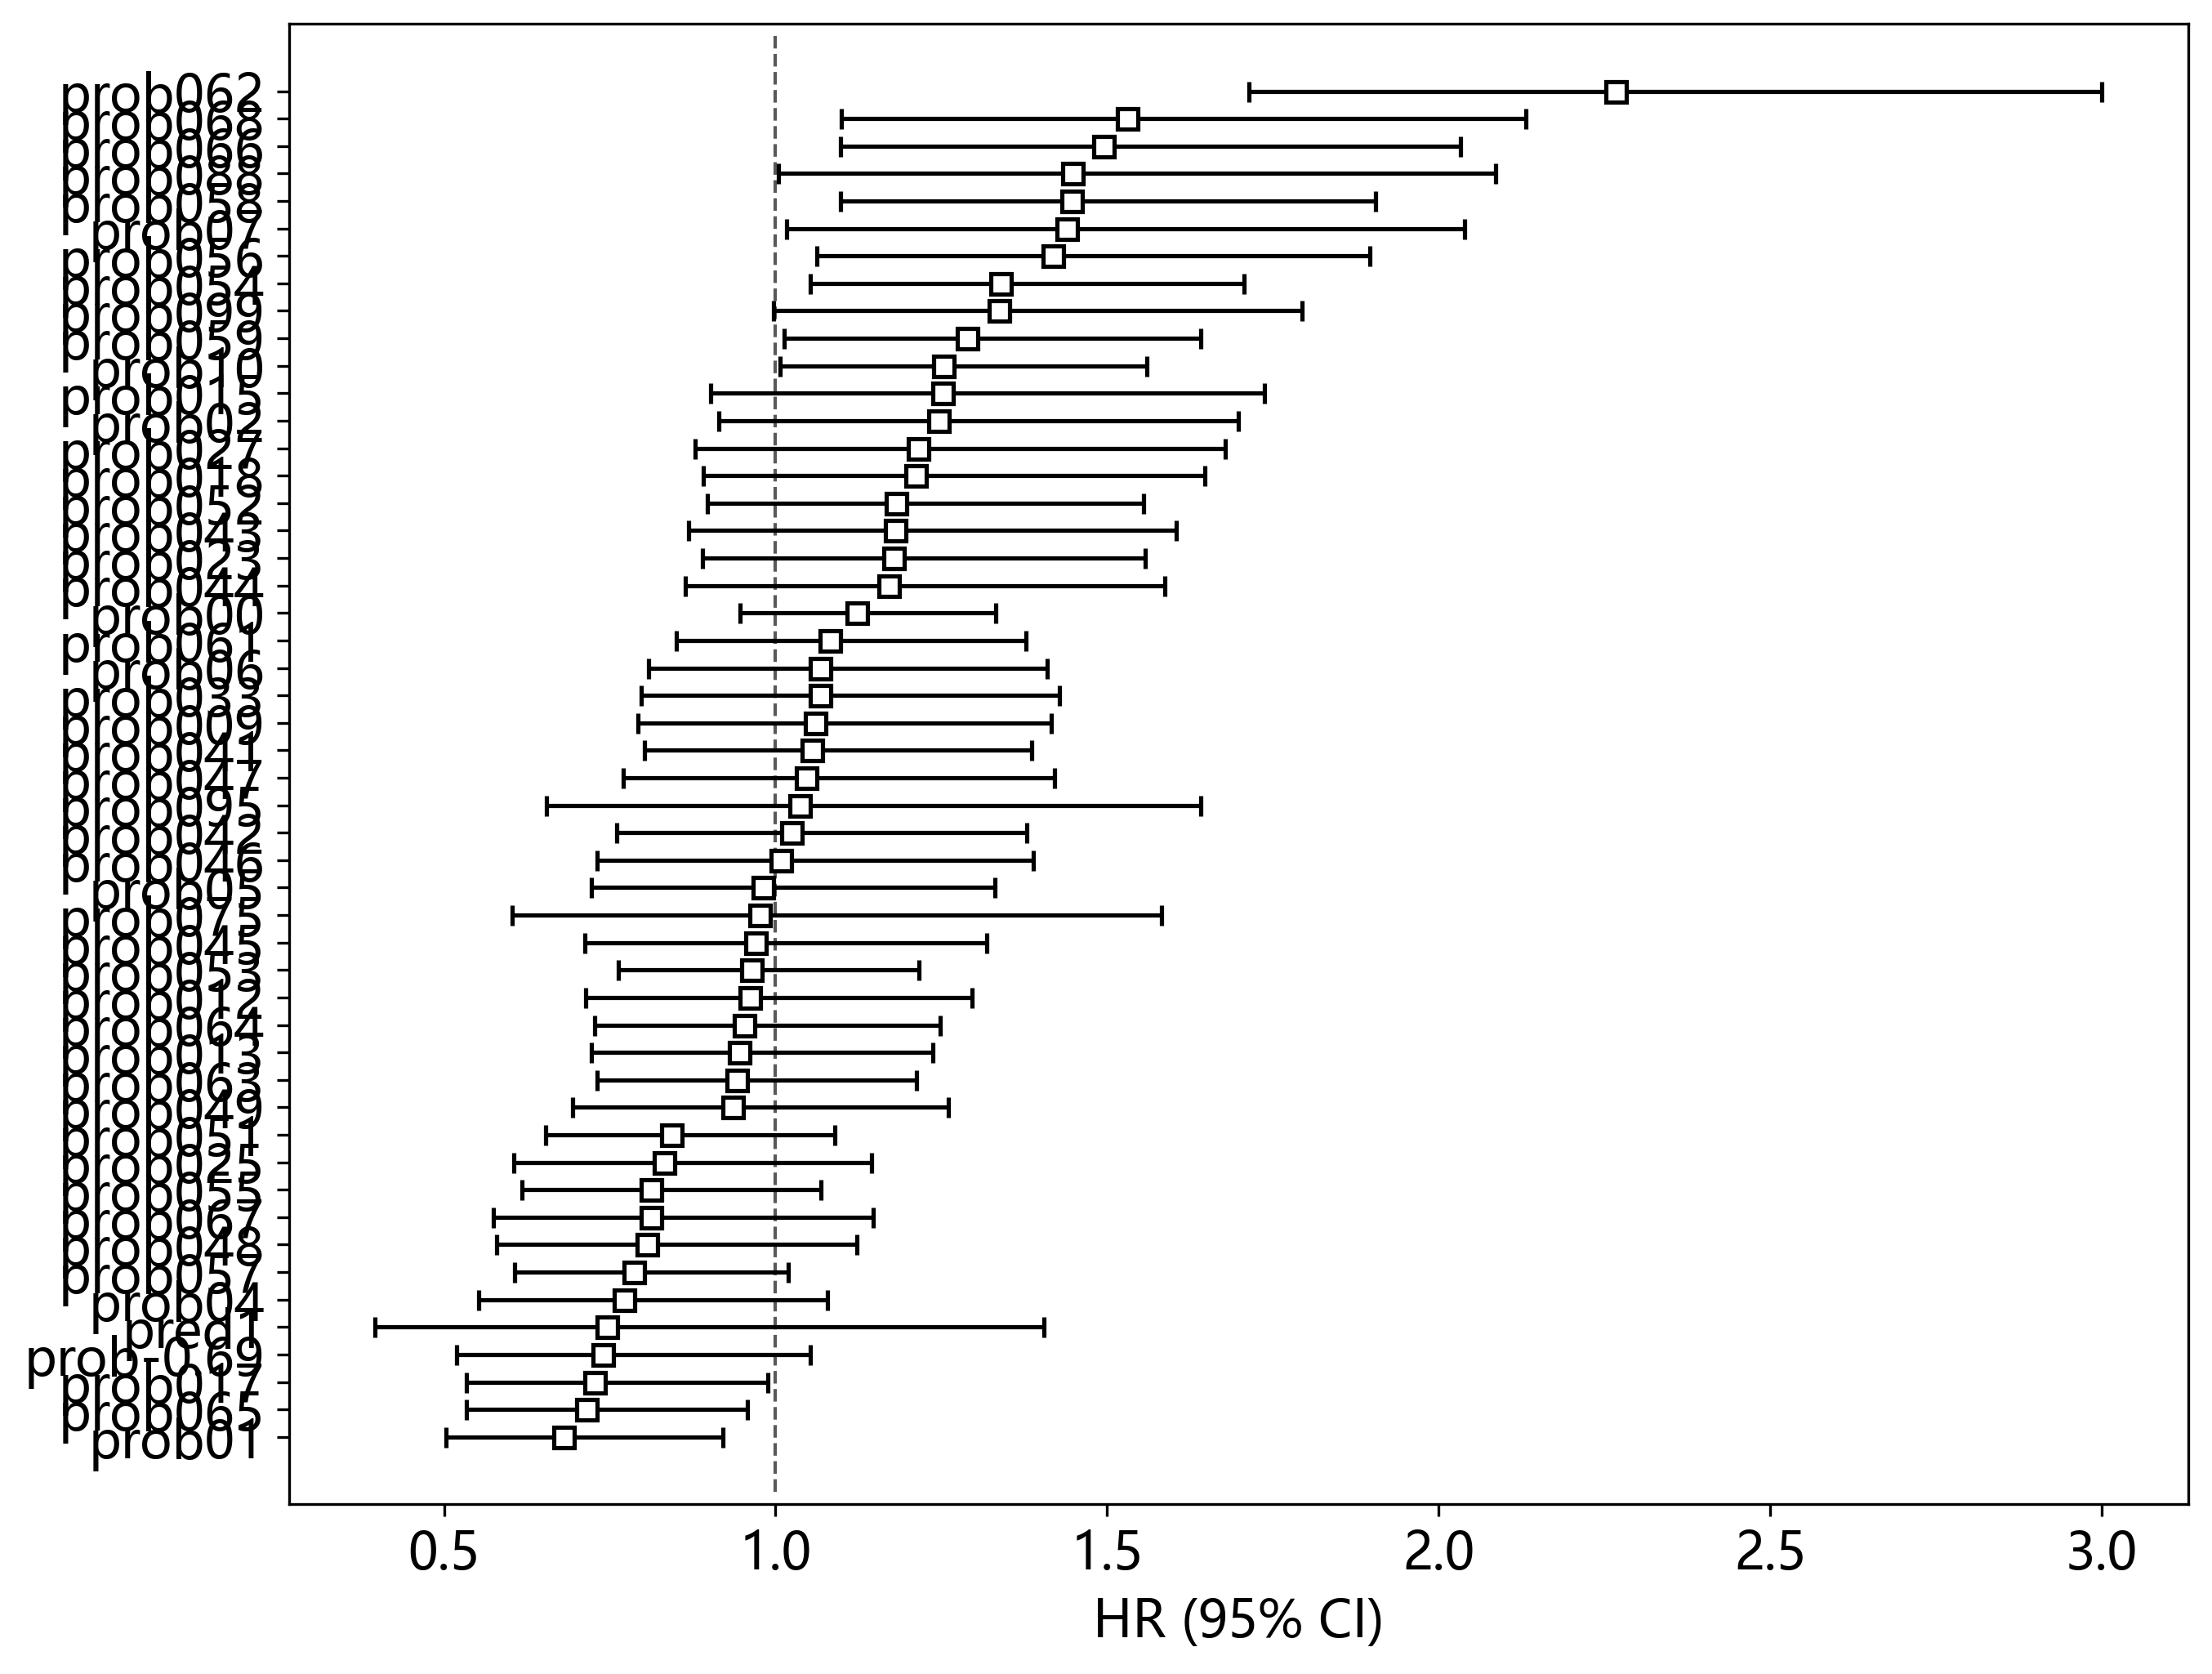

In [50]:
import matplotlib.pyplot as plt

cph.plot(hazard_ratios=True)
plt.savefig(f'img/{task_type}feature_pvalue.svg')
plt.show()

In [51]:
from onekey_algo.custom.components.ugly import drop_survival

def get_sel(cox_data, cph, drop_num):
    kid = drop_survival(cox_data, cph, drop_num=drop_num, is_drop_ids=False)
    print(set(cox_data['ID']) - set(kid['ID']))
    cox_data = pd.merge(cox_data, kid[['ID']], on='ID', how='inner')
    return cox_data
# for dn, subset in [(152, 'test')]:
#     val_datasets[subset+'sel'] = get_sel(val_datasets[subset][[c for c in val_datasets[subset].columns if c not in ['group']]], cph, dn)

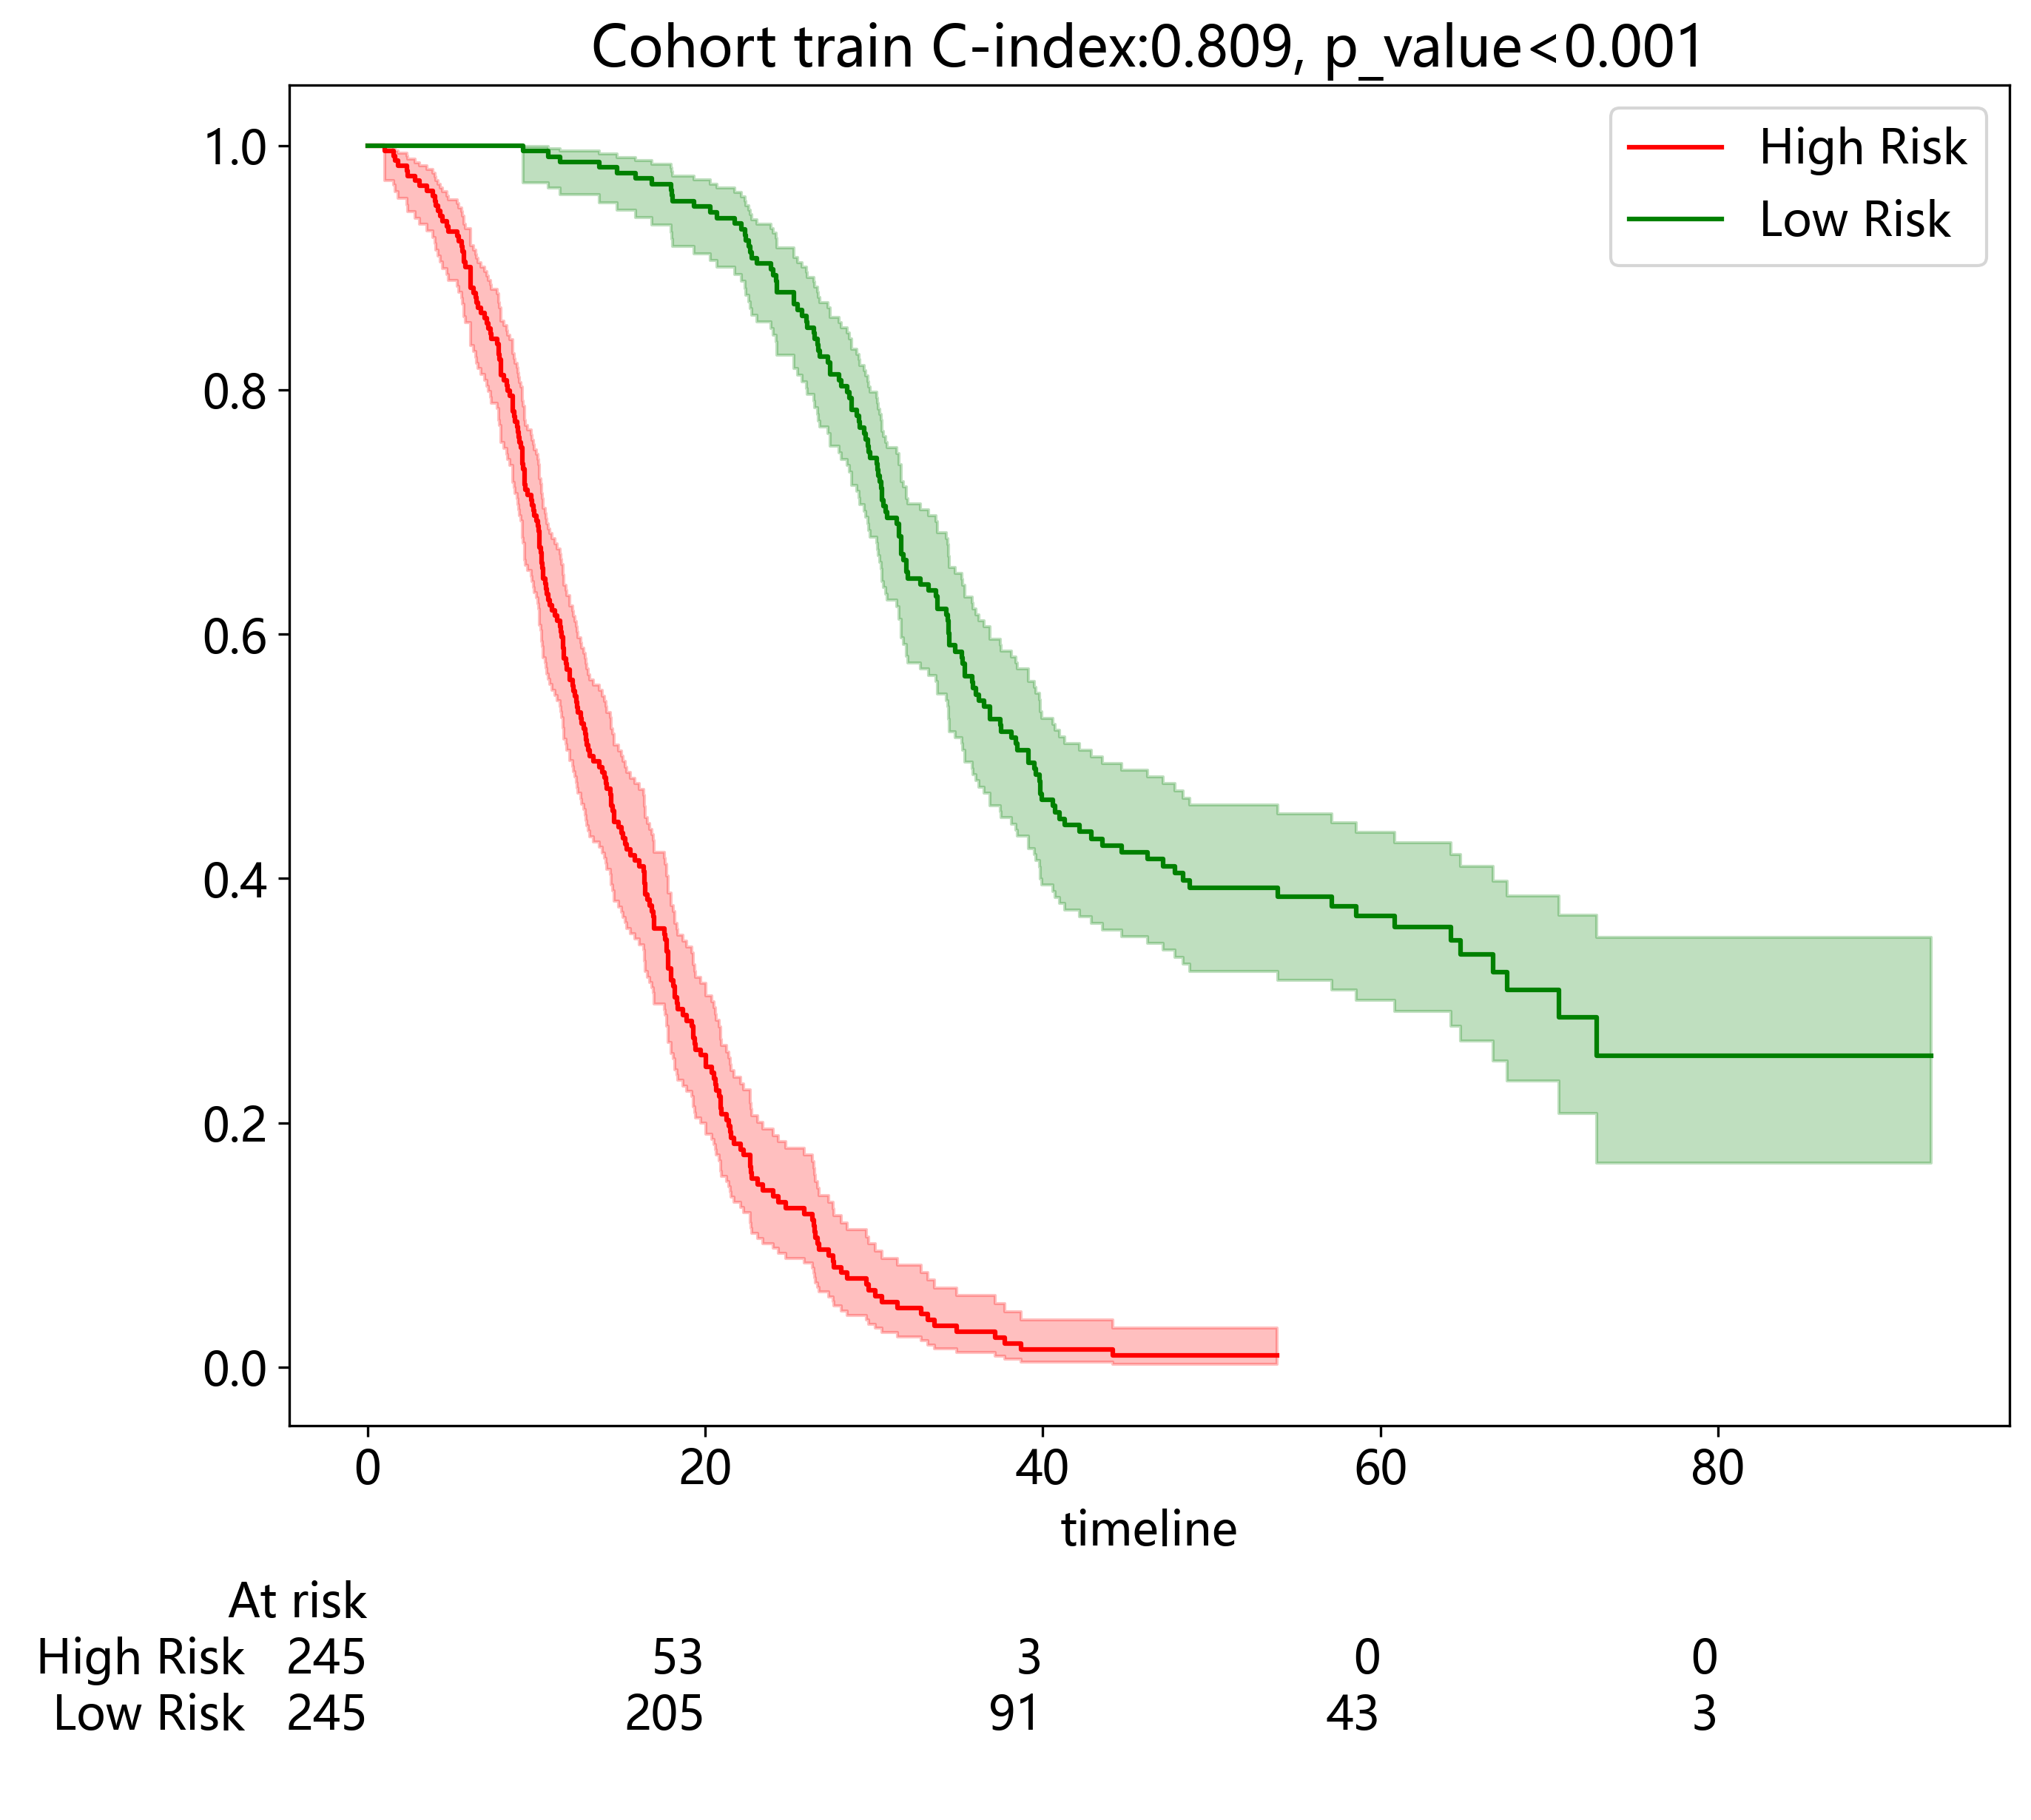

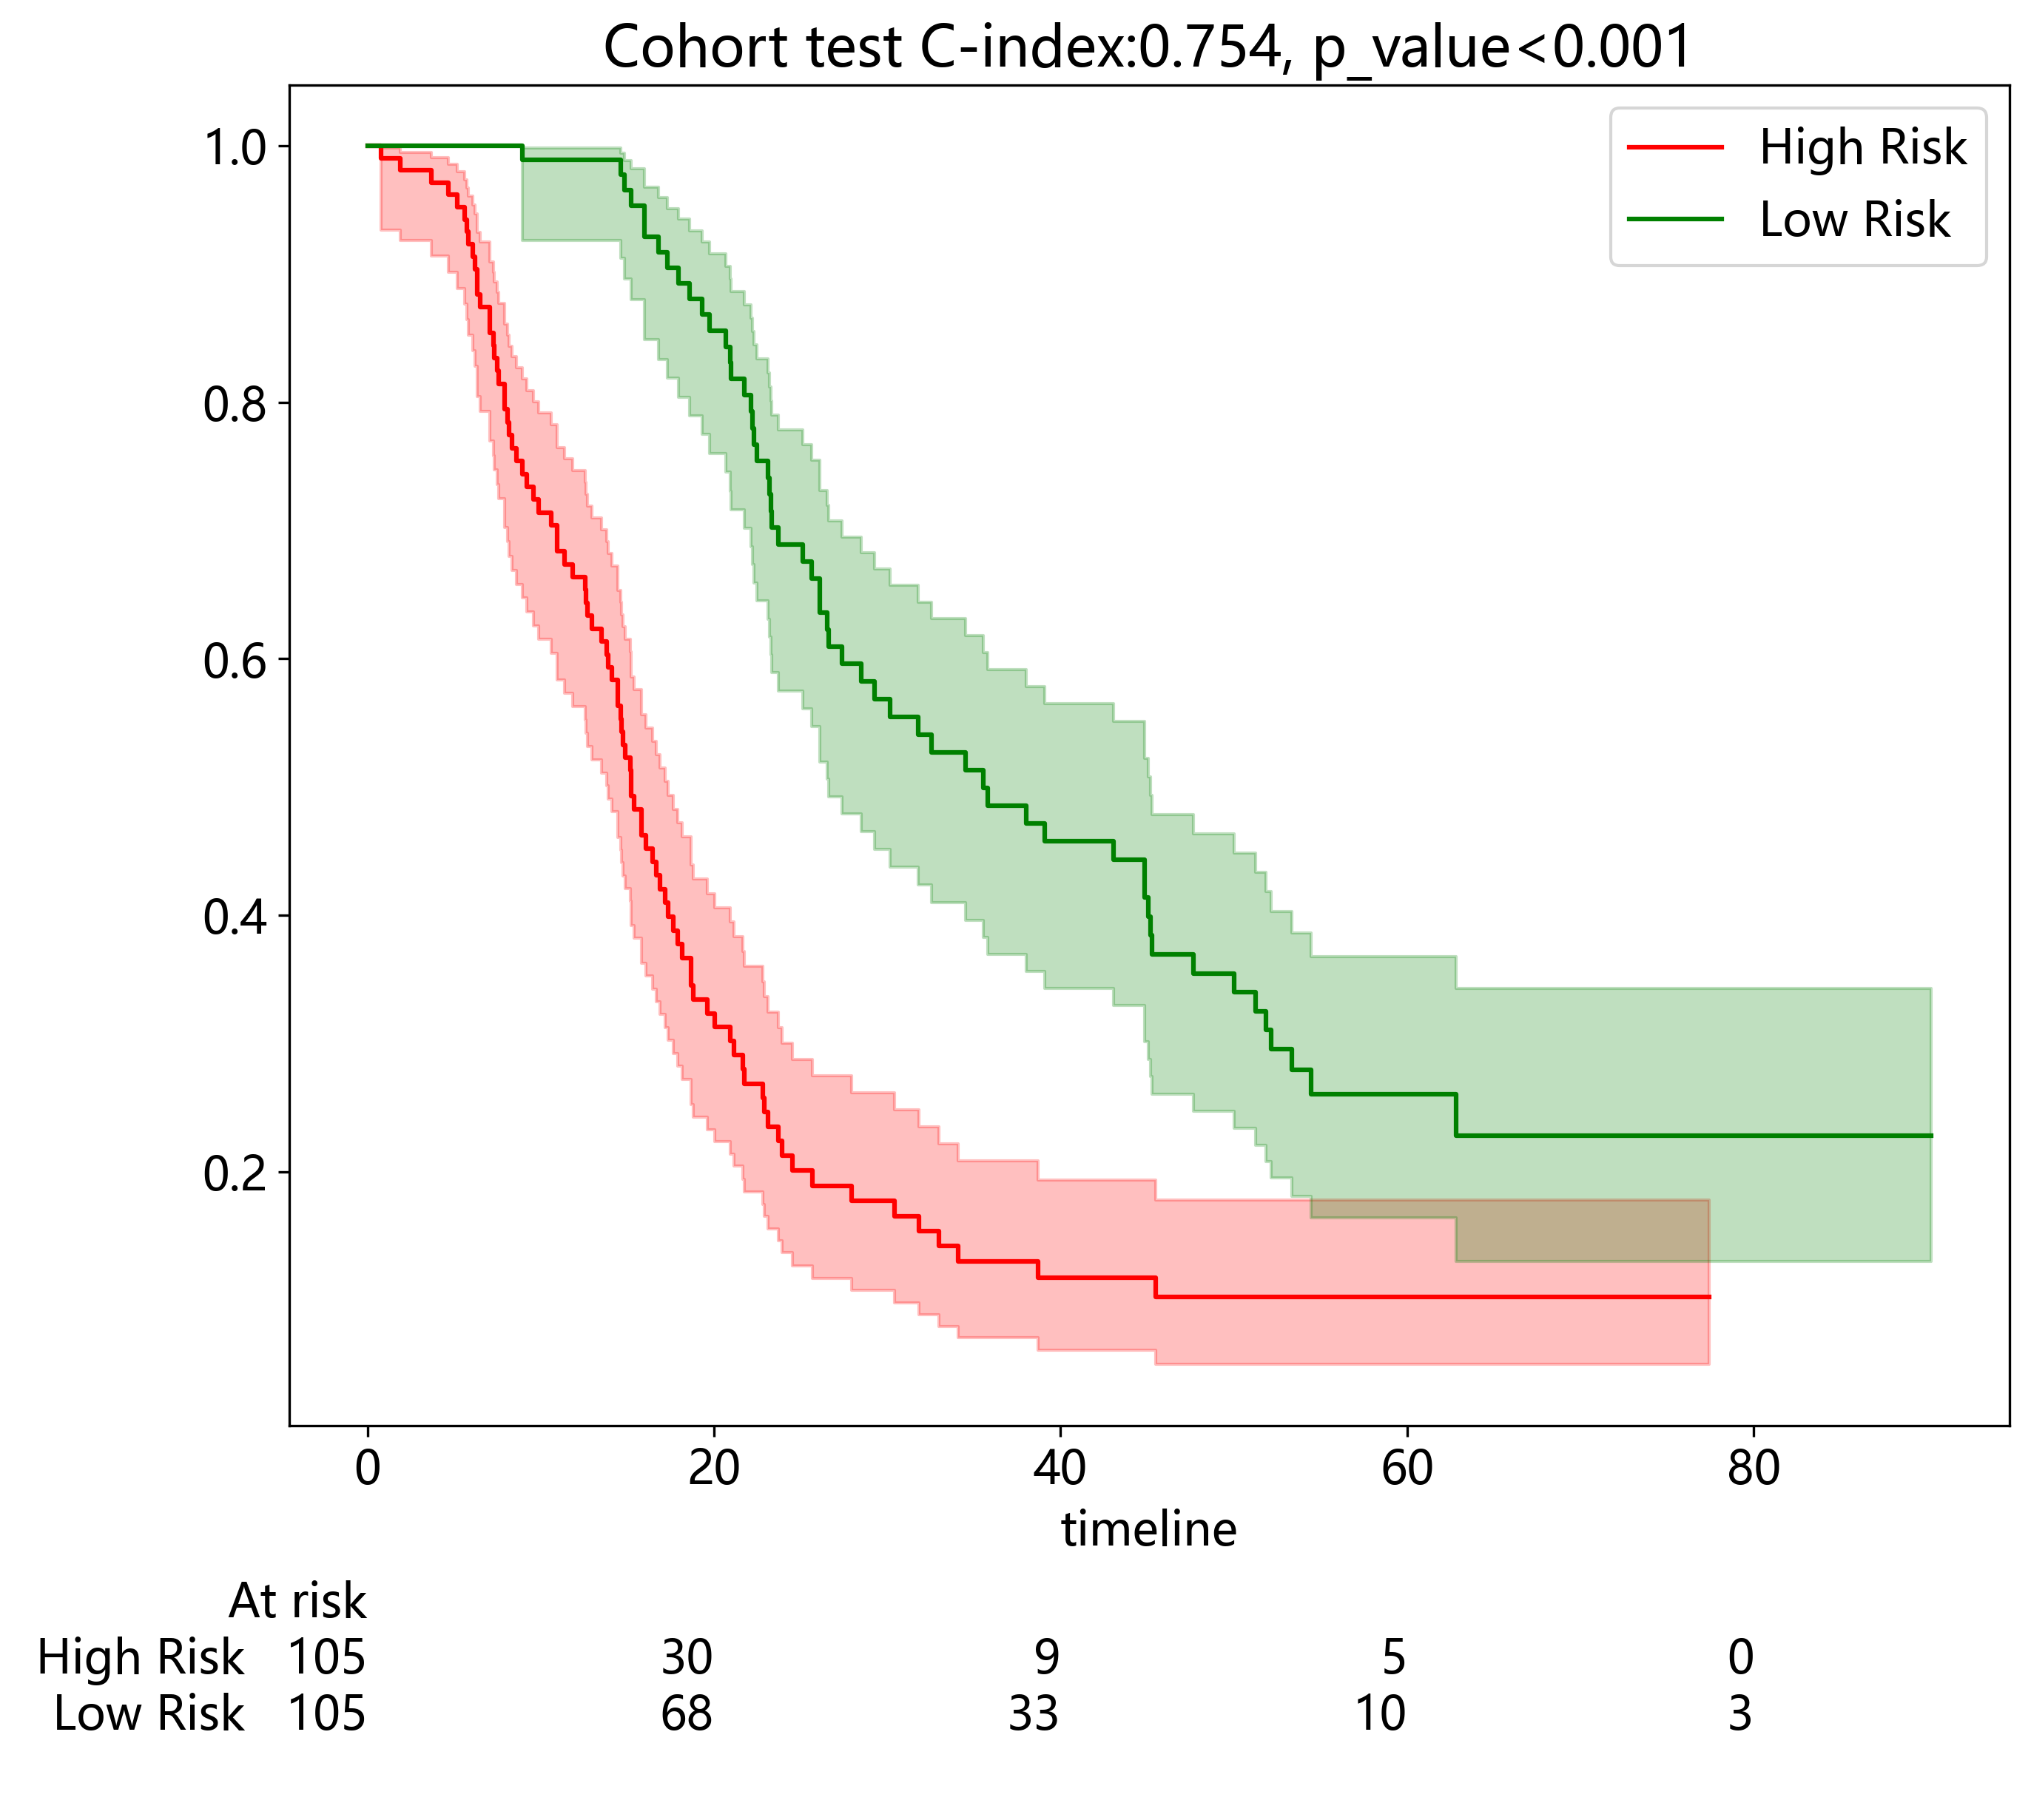

In [54]:
from lifelines import CoxPHFitter
from lifelines.statistics import logrank_test
from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts

for subset, test_data in val_datasets.items():
    if subset == 'test_ex':
        continue
    c_index = cph.score(test_data[[c for c in test_data.columns if c not in ['ID', 'group']]], scoring_method="concordance_index")
#     y_pred = cph.predict_median(test_data[[c for c in test_data.columns if c != 'ID']])
#     cox_data = pd.concat([test_data, y_pred], axis=1)
#     mean = cox_data.describe()[0.5]['mean']
#     cox_data['HR'] = cox_data[0.5] < mean
    y_pred = cph.predict_partial_hazard(test_data[[c for c in test_data.columns if c != 'ID']])
    cox_data = pd.concat([test_data, y_pred], axis=1)
    mean = cox_data.describe()[0]['50%']
    cox_data['HR'] = cox_data[0] > mean
#     cox_data['HR'] = cox_data[0] > 1

    dem = (cox_data["HR"] == True)
    results = logrank_test(cox_data[duration_col][dem], cox_data[duration_col][~dem], 
                           event_observed_A=cox_data[event_col][dem], event_observed_B=cox_data[event_col][~dem])
    p_value = "<0.001" if results.p_value < 0.001 else "={results.p_value:.4f}"
    plt.title(f"Cohort {subset} C-index:{c_index:.3f}, p_value{p_value}")
    if sum(dem):
        kmf_high = KaplanMeierFitter()
        kmf_high.fit(cox_data[duration_col][dem], event_observed=cox_data[event_col][dem], label="High Risk")
        kmf_high.plot_survival_function(color='r')
    if sum(~dem):
        kmf_low = KaplanMeierFitter()
        kmf_low.fit(cox_data[duration_col][~dem], event_observed=cox_data[event_col][~dem], label="Low Risk")
        kmf_low.plot_survival_function(color='g')
    add_at_risk_counts(kmf_high, kmf_low, rows_to_show=['At risk'])
    plt.savefig(f'img/{task_type}KM_{subset}.svg', bbox_inches='tight')
    plt.show()

In [55]:
import os
import numpy as np

def get_prediction(model: CoxPHFitter, data, ID=None, **kwargs):
    hr = model.predict_partial_hazard(data)
    expectation = model.predict_expectation(data)
    
    predictions = pd.concat([hr, expectation], axis=1)
    predictions.columns = ['HR', 'expectation']
    if ID is not None:
        predictions = pd.concat([ID, hr, expectation], axis=1)
        predictions.columns = ['ID', 'HR', 'expectation']
    else:
        predictions = pd.concat([hr, expectation], axis=1)
        predictions.columns = ['HR', 'expectation']
    return predictions
os.makedirs('results', exist_ok=True)
kids = []
for subset, test_data in val_datasets.items():
    results = get_prediction(cph, test_data, ID=test_data['ID'])
    results.to_csv(f'results/{task_type}cox_predictions_{subset}.csv', index=False)
    results['group'] = subset
    kids.append(results[['ID', 'group']])

In [17]:
# pd.concat(kids, axis=0).to_csv('data/path_ids.csv', index=False)